# Venkata Sai Harshith Gubbala

*AIML Internship project*

Music Popularity Prediction:

Music popularity prediction means using regression techniques to forecast the popularity of songs based on various music features and metadata.

Expected results include accurate predictions of a song's future performance in terms of streams, downloads, and chart positions, which enable music producers, artists, and marketers to make informed decisions.

To get started with music popularity prediction, we need a dataset of various songs with their musical features and historical data on how much popularity the songs got.

I found an ideal dataset for this task which includes 227 music tracks, each described by their music features along with additional metadata like track name, artists, album name, and release date.

Dataset:

https://drive.google.com/drive/u/5/folders/1g2_Ku6oRsY8cV8dz9DRtKMw aXhSTMmsU

In [ ]:
df = pd.read_csv("Spotify_data.csv")

In [ ]:
import pandas as pd

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print(df)


     Unnamed: 0                                         Track Name  \
0             0                                        Not Like Us   
1             1                                            Houdini   
2             2                         BAND4BAND (feat. Lil Baby)   
3             3                                 I Don't Wanna Wait   
4             4                                              Pedro   
5             5                                          Type Shit   
6             6                                           CARNIVAL   
7             7                                              Prada   
8             8                                           euphoria   
9             9                                             redrum   
10           10                                        Lovin On Me   
11           11                             Thank You (Not So Bad)   
12           12                                           fukumean   
13           13     

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Load the dataset (try CSV first, fallback to Excel)
try:
    df = pd.read_csv("Spotify_data.csv")
except:
    df = pd.read_excel("Spotify_data.xlsx")

In [ ]:
# Basic info
print("Dataset Shape:", df.shape)
print("Columns:", df.columns)
print(df.head())

Dataset Shape: (227, 22)
Columns: Index(['Unnamed: 0', 'Track Name', 'Artists', 'Album Name', 'Album ID',
       'Track ID', 'Popularity', 'Release Date', 'Duration (ms)', 'Explicit',
       'External URLs', 'Danceability', 'Energy', 'Key', 'Loudness', 'Mode',
       'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness',
       'Valence', 'Tempo'],
      dtype='object')
   Unnamed: 0                  Track Name  \
0           0                 Not Like Us   
1           1                     Houdini   
2           2  BAND4BAND (feat. Lil Baby)   
3           3          I Don't Wanna Wait   
4           4                       Pedro   

                                   Artists                  Album Name  \
0                           Kendrick Lamar                 Not Like Us   
1                                   Eminem                     Houdini   
2                    Central Cee, Lil Baby  BAND4BAND (feat. Lil Baby)   
3                David Guetta, OneRepublic          

In [ ]:
columns_to_drop = ['track_name', 'artist_name', 'album_name', 'release_date']
for col in columns_to_drop:
    if col in df.columns:
        df.drop(col, axis=1, inplace=True)


In [ ]:
for col in df.select_dtypes(include='object').columns:
    df[col] = LabelEncoder().fit_transform(df[col])


In [ ]:
print("Cleaned Data:")
print(df.head())

Cleaned Data:
   Unnamed: 0  Track Name  Artists  Album Name  Album ID  Track ID  \
0           0         104       93         107       150       172   
1           1          59       65          66       179        65   
2           2          16       44          21       124       203   
3           3          63       53          69        24        82   
4           4         113       87         115       165       114   

   Popularity  Release Date  Duration (ms)  Explicit  ...  Energy  Key  \
0          96           163         274192      True  ...   0.472    1   
1          94           173         227239      True  ...   0.887    9   
2          91           170         140733      True  ...   0.764   11   
3          90           158         149668     False  ...   0.714    1   
4          89           157         144846     False  ...   0.936    9   

   Loudness  Mode  Speechiness  Acousticness  Instrumentalness  Liveness  \
0    -7.001     1       0.0776        0.0107

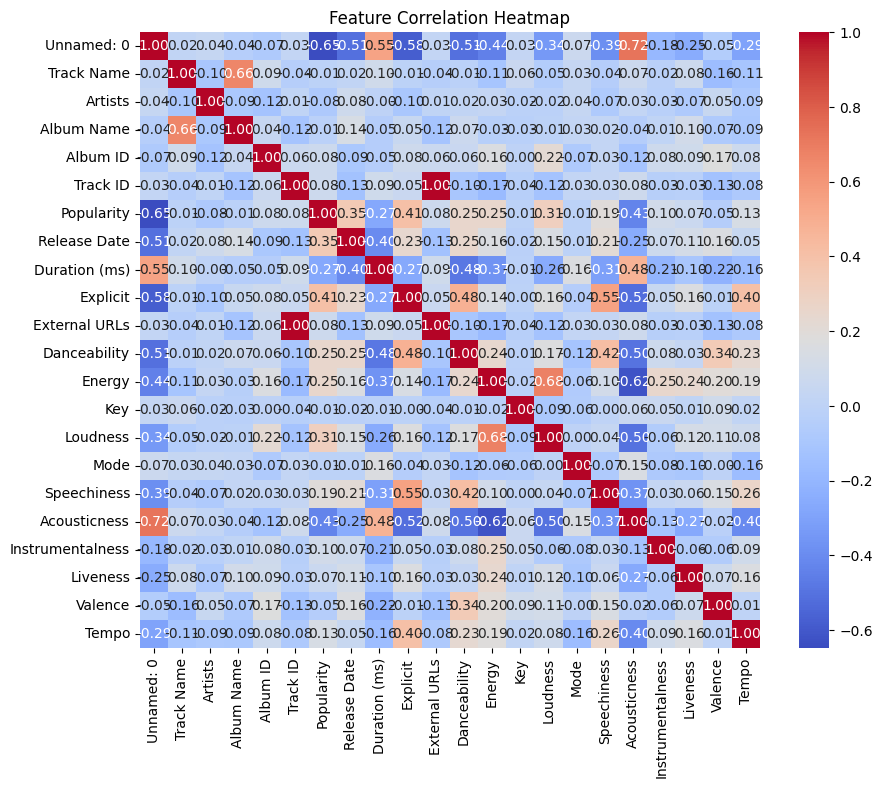

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
df.columns = df.columns.str.strip().str.lower()

X = df.drop('popularity', axis=1)
y = df['popularity']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [ ]:
def evaluate(y_true, y_pred, model_name):
    print(f"\n🔍 {model_name} Evaluation:")
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("MSE:", mean_squared_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R² Score:", r2_score(y_true, y_pred))

evaluate(y_test, y_pred_rf, "Random Forest")
evaluate(y_test, y_pred_lr, "Linear Regression")



🔍 Random Forest Evaluation:
MAE: 3.4771739130434782
MSE: 31.315176086956523
RMSE: 5.595996433786973
R² Score: 0.5295163831297927

🔍 Linear Regression Evaluation:
MAE: 4.95332325066301
MSE: 48.30703125046761
RMSE: 6.9503259815973815
R² Score: 0.2742283575263458


In [5]:
import pandas as pd

df = pd.read_csv("Spotify_data.csv")

df = df.dropna()

print(df.head())


   Unnamed: 0                  Track Name  \
0           0                 Not Like Us   
1           1                     Houdini   
2           2  BAND4BAND (feat. Lil Baby)   
3           3          I Don't Wanna Wait   
4           4                       Pedro   

                                   Artists                  Album Name  \
0                           Kendrick Lamar                 Not Like Us   
1                                   Eminem                     Houdini   
2                    Central Cee, Lil Baby  BAND4BAND (feat. Lil Baby)   
3                David Guetta, OneRepublic          I Don't Wanna Wait   
4  Jaxomy, Agatino Romero, Raffaella Carrà                       Pedro   

                 Album ID                Track ID  Popularity Release Date  \
0  5JjnoGJyOxfSZUZtk2rRwZ  6AI3ezQ4o3HUoP6Dhudph3          96   2024-05-04   
1  6Xuu2z00jxRPZei4IJ9neK  2HYFX63wP3otVIvopRS99Z          94   2024-05-31   
2  4AzPr5SUpNF553eC1d3aRy  7iabz12vAuVQYyekFIWJxD 

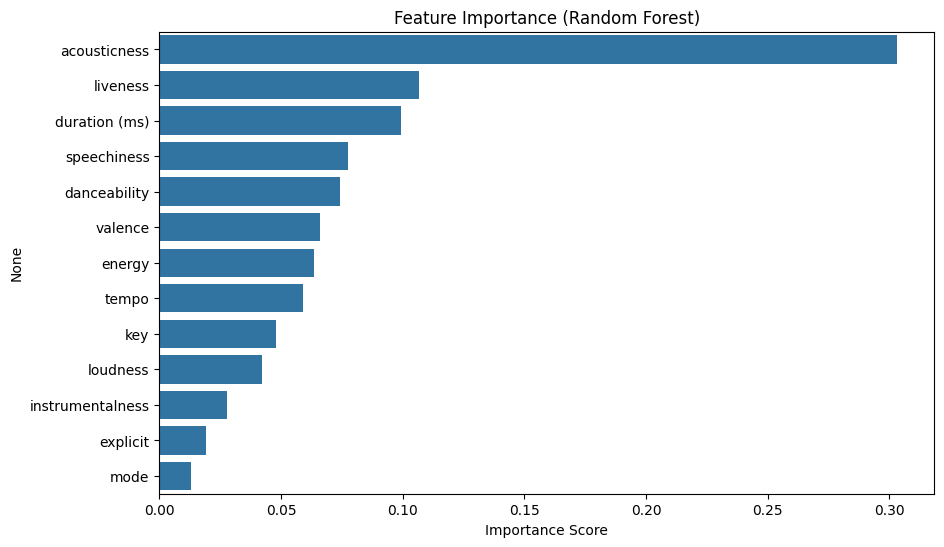

In [ ]:
# Feature Importance
importances = rf.feature_importances_
feature_names = X.columns
sorted_idx = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[sorted_idx], y=feature_names[sorted_idx])
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.show()
